In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/sample_data/international_matches.csv')
dataset = dataset.dropna()
dataset = dataset[dataset['home_team_result'] != 'Draw']

x = dataset[
[
 'home_team_fifa_rank',
 'away_team_fifa_rank',
 'home_team_total_fifa_points',
 'away_team_total_fifa_points',
 'home_team_goalkeeper_score',
 'away_team_goalkeeper_score',
 'home_team_mean_defense_score',
 'away_team_mean_defense_score',
 'home_team_mean_midfield_score',
 'away_team_mean_midfield_score',
 'home_team_mean_offense_score',
 'away_team_mean_offense_score'
]
]

y = dataset['home_team_result']
print(y.value_counts())

home_team_result
Win     1950
Lose    1263
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state=42)
model.fit(x_train_scaled,y_train)

SVC(random_state=42)

In [ ]:
y_pred = model.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7340590979782271
Confusion Matrix:
 [[130 112]
 [ 59 342]]
Classification Report:
               precision    recall  f1-score   support

        Lose       0.69      0.54      0.60       242
         Win       0.75      0.85      0.80       401

    accuracy                           0.73       643
   macro avg       0.72      0.70      0.70       643
weighted avg       0.73      0.73      0.73       643



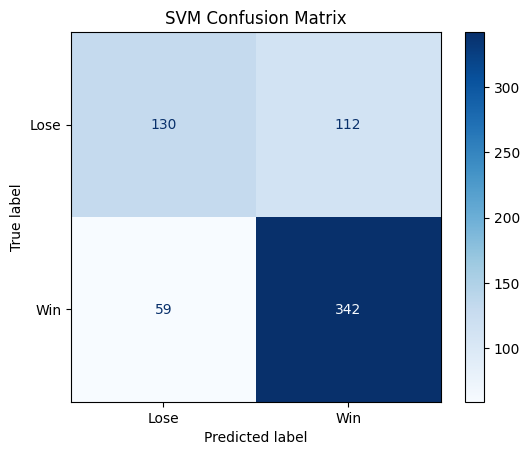

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


labels = ['Lose', 'Win']

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=labels
)

disp.plot(cmap='Blues', values_format='d')
plt.title("SVM Confusion Matrix")
plt.show()


**The same thing is done here with SVM:**


---
---


**There are two evaluation **Paths** for using **SVM** with this dataset:**

# ***Path 1:***

* **Y =  Win | Draw | Lose**

* **test_size = 0.2**

* **Kernel = RBF**

***The results of these settings were:***

> **Accuracy** = 0.52

> Confusion Matrix:

     | 1   79  147  |

     | 4  135  114  |

     | 2   68  311  |

---

# ***Path 2:***

* **Y =  Win | Lose**

* **test_size = 0.2**

* **Kernel = RBF**

***The results of these settings were:***



> **Accuracy** = 0.73

> **Confusion Matrix:**

     | 130  112  |


     |  59  342  |

---

> ***The conclusion to these trials is:***

- **SVM performance depended on the number of outcomes same as KNN, the difference is:**
    
 > * when the outcomes were ( Win | Draw | Lose ) the accuracy was 0.52.

 > * when the outcomes werre binary ( Win | Lose ) the accuracy improved to 0.73 almost half of the first trial.

- **SVM performance was better than KNN in this dataset**
---
---

